In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from strategies import Strategy, RelativeReturns, ExponentialMovingAverage

In [2]:
# Retrieve Data
tickers = ['DIS', 'JNJ', 'PEP']
start_date = "2014-01-01"
end_date = "2019-12-31"

panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
close = panel_data["Close"]

# Relative Returns

In [15]:
RR = RelativeReturns(close, start_date, end_date)

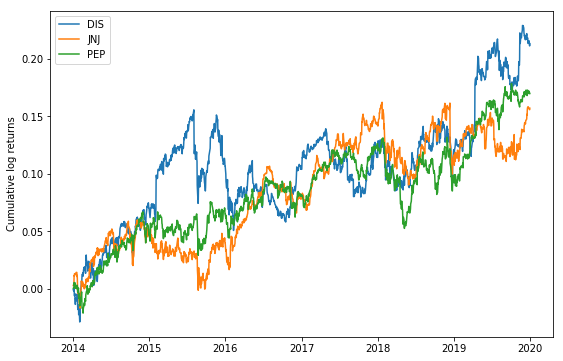

In [16]:
RR.plot_cum_log_returns()

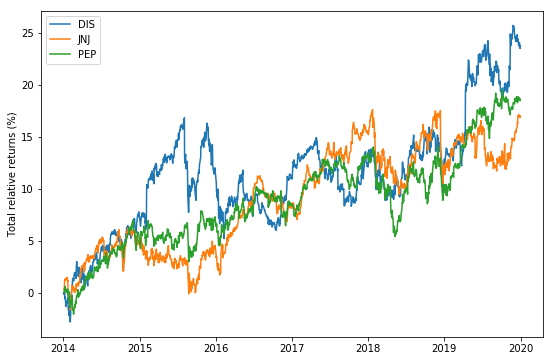

In [17]:
RR.plot_cum_relative_returns()

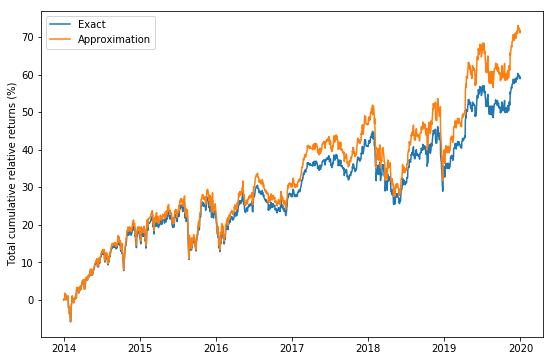

In [23]:
RR.plot_all_assets_behavior()

In [18]:
RR.compute_portfolio_return("year")

Total portfolio return is 59.31%
Average yearly return is 8.04%


(0.5931157747024949, 8.043886176784575)

# Exponential Moving Average

In [19]:
EMA = ExponentialMovingAverage(close, start_date, end_date)

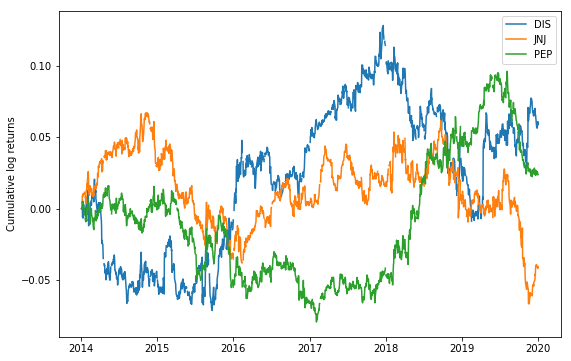

In [20]:
EMA.plot_cum_log_returns()

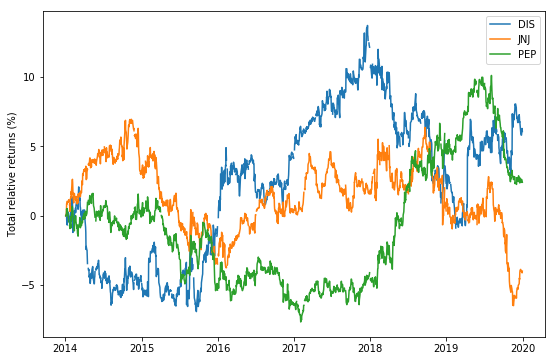

In [21]:
EMA.plot_cum_relative_returns()

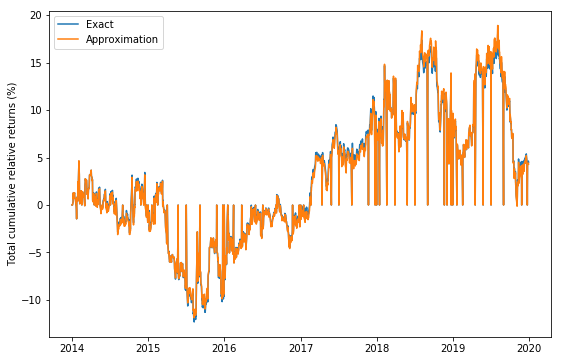

In [22]:
EMA.plot_all_assets_behavior()

In [24]:
EMA.compute_portfolio_return("year")

Total portfolio return is 4.51%
Average yearly return is 0.74%


(0.04513664211357393, 0.7361394172863411)

# Compare Strategies Implemented

In [9]:
def compare_strategies():
    fig, ax = plt.subplots(figsize=(9,6))
    for c in Strategy.__subclasses__():
        if c.implemented:
            strat = c(close, start_date, end_date)
            ax.plot(strat.cum_relative_returns_exact.index, strat.cum_relative_returns_exact * 100, label=c.name)
    ax.legend(loc='best')
    plt.show()

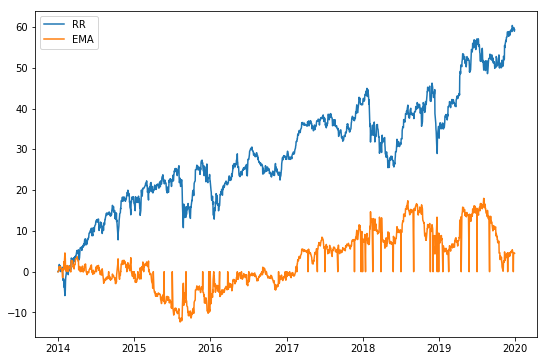

In [10]:
compare_strategies()